In [336]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

На нескольких алгоритмах кластеризации, умеющих работать с sparse матрицами, проверьте, что работает лучше Count_Vectorizer или TfidfVectorizer (попробуйте выжать максимум из каждого - попробуйте нграммы, символьные нграммы, разные значения max_features и min_df) (3 балла)

На нескольких алгоритмах кластеризации проверьте, какое матричное разложение (TruncatedSVD или NMF) работает лучше для кластеризации. (3 балла)

С помощью алгоритмов, умеющих выделять выбросы, попробуйте найти необычные объявления (необычные - это такие, которые непонятно к какой категории можно вообще отнести, что-то с ошибками или вообще какая-то дичь). В этом задании можно использовать любую векторизацию. (4 балла)

Используйте те же данные, что и в семинаре (колонки - title и category_name)

Делайте соответствующие вашими ресурсам и потребностям алгоритма подвыборки из всего датасета. Для сравнения используйте любую из метрик, которые есть в семинаре. Оценивать на глаз тоже можно, но тогда нужно объяснить, почему вы считаете одну кластеризацию лучше.

НЕ ЗАБЫВАЙТЕ подбирать параметры в кластеризации. За использование всех параметров по умолчанию, оценка будет снижаться (под использованием всех параметров по умолчанию я имею в виду что-то такое - cluster = DBSCAN())

Если получится, используйте метод локтя. (1 бонусный балл)

In [337]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, DBSCAN, \
                            KMeans, MiniBatchKMeans, Birch, MeanShift, SpectralClustering
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, \
                            silhouette_score, homogeneity_score, completeness_score, \
                            v_measure_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [338]:
data = pd.read_csv('data.csv')

In [339]:
data = data[['category_name', 'title']]

На нескольких алгоритмах кластеризации, умеющих работать с sparse матрицами, проверьте, что работает лучше Count_Vectorizer или TfidfVectorizer (попробуйте выжать максимум из каждого - попробуйте нграммы, символьные нграммы, разные значения max_features и min_df) <br>
<b>(3 балла)</b>

In [340]:
def eval_clusterization(X, y, cluster_labels):
    silhouette = silhouette_score(X, cluster_labels)
    homogeneity = homogeneity_score(y, cluster_labels)
    completeness = completeness_score(y, cluster_labels)
    v_measure = v_measure_score(y, cluster_labels)
    adj_rand = adjusted_rand_score(y, cluster_labels)
    mi_score = adjusted_mutual_info_score(y, cluster_labels)
    print('Clusterization metrics')
    print(f'Silhouette score: {silhouette:.3f}')
    print(f'Homogeneity score: {homogeneity:.3f}')
    print(f'Completeness score: {completeness:.3f}')
    print(f'V-measure: {v_measure:.3f}')
    print(f'Ajusted Rand Index: {adj_rand:.3f}')
    print(f'Adjusted Mutual Information score: {mi_score:.3f}')

In [341]:
def fit_and_eval(X, y, clusterizer):
    global sample
    clusterizer.fit(X)
    labels = clusterizer.labels_
    eval_clusterization(X, y, labels)
    sample['cluster'] = labels

#### Affinity Propagation

In [342]:
sample = data.sample(frac=0.01)
y = sample['category_name']

*TfidfVectorizer*

In [343]:
tf = TfidfVectorizer(min_df=2, max_df=0.9, max_features=500, ngram_range=(1, 2))
X_tf = tf.fit_transform(sample['title'])

In [344]:
cluster = AffinityPropagation(damping=0.7, preference=-2, 
                              max_iter=400, verbose=2,
                              convergence_iter=10)

fit_and_eval(X_tf, y, cluster)

Did not converge
Clusterization metrics
Silhouette score: 0.496
Homogeneity score: 0.591
Completeness score: 0.389
V-measure: 0.469
Ajusted Rand Index: -0.013
Adjusted Mutual Information score: 0.198


*CountVectorizer*

In [345]:
cv = CountVectorizer(min_df=3, max_df=0.6, max_features=1000)
X_cv = cv.fit_transform(sample['title'])

In [346]:
cluster = AffinityPropagation(damping=0.7, preference=-2, 
                              max_iter=400, verbose=2,
                              convergence_iter=10)

fit_and_eval(X_cv, y, cluster)

Converged after 244 iterations.
Clusterization metrics
Silhouette score: 0.481
Homogeneity score: 0.601
Completeness score: 0.371
V-measure: 0.459
Ajusted Rand Index: -0.010
Adjusted Mutual Information score: 0.155


Для этого алгоритма оба способа векторизации выдают близкие значения V-measure. У tf преимущество по silhouette score, а у cv по homogeneity. У tf выше показатели completeness и MI score, поэтому, на мой взгляд, в данном случае он лучше подходит для данного алгоритма.

#### K-means

In [348]:
sample = data.sample(frac=0.01)
y = sample['category_name']

*TfidfVectorizer*

In [349]:
tf = TfidfVectorizer(min_df=2, max_df=0.8, max_features=500)
X_tf = tf.fit_transform(sample['title'])

In [350]:
cluster = KMeans(n_clusters=47, n_jobs=-1, random_state=0)
fit_and_eval(X_tf, y, cluster)

Clusterization metrics
Silhouette score: 0.224
Homogeneity score: 0.318
Completeness score: 0.406
V-measure: 0.357
Ajusted Rand Index: -0.001
Adjusted Mutual Information score: 0.249


*CountVectorizer*

In [351]:
cv = CountVectorizer(min_df=3, max_df=0.4, max_features=1000)
X_cv = cv.fit_transform(sample['title'])

In [352]:
cluster = KMeans(n_clusters=47, n_jobs=-1, random_state=0)
fit_and_eval(X_cv, y, cluster)

Clusterization metrics
Silhouette score: 0.184
Homogeneity score: 0.276
Completeness score: 0.405
V-measure: 0.328
Ajusted Rand Index: 0.003
Adjusted Mutual Information score: 0.212


У tf выше homogeneity, но ниже completeness. У tf значительно выше silhouette score. MI score также выше. tf здесь опять же лучше.

Если получится, используйте метод локтя. <br> <b>(1 бонусный балл)</b>

In [347]:
def elbow_method(X, clusterizer, left_boundary, right_boundary, step):
    scores = []
    for i in range(left_boundary, right_boundary, step):
        cluster = clusterizer(n_clusters=i, n_jobs=-1, random_state=0)
        cluster.fit(X)
        labels = cluster.labels_
        score = silhouette_score(X, labels)
        scores.append(score)
    plt.figure(figsize=(12, 5))
    plt.plot(list(range(left_boundary, right_boundary, step)), scores)
    return scores

[0.18342572161570042,
 0.29745714764594167,
 0.36429422641953124,
 0.43063628672781123,
 0.4865221069677786,
 0.5261360445325831,
 0.547916441125916,
 0.5715974585660296,
 0.5834028328256952,
 0.5929605096910143,
 0.6020625061185594,
 0.6077160362627526,
 0.6146577537530645,
 0.6233279851169248,
 0.6262296002586222,
 0.6305121135018382,
 0.6301527362085086]

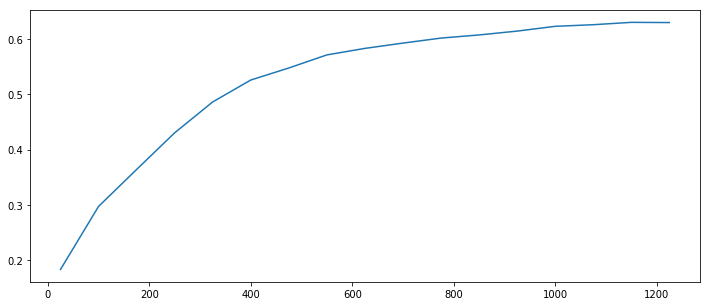

In [356]:
elbow_method(X_tf, KMeans, 25, 1250, 75)

Видим, что в районе 1100 кластеров перестает расти silhouette score.

In [357]:
cluster = KMeans(n_clusters=1100, n_jobs=-1, random_state=0)
cluster.fit(X_tf)
c_labels = cluster.labels_
eval_clusterization(X_tf, y, c_labels)

Clusterization metrics
Silhouette score: 0.627
Homogeneity score: 0.742
Completeness score: 0.390
V-measure: 0.511
Ajusted Rand Index: -0.003
Adjusted Mutual Information score: 0.111


Все метрики действительно повысились. При этом не ясно как интерпретировать такое количество кластеров.

#### Spectral Clustering

In [71]:
sample = data.sample(frac=0.01)
y = sample['category_name']

*TfidfVectorizer*

In [72]:
tf = TfidfVectorizer(min_df=2, max_df=0.8, max_features=500)
X_tf = tf.fit_transform(sample['title'])

In [73]:
cluster = SpectralClustering(n_clusters=47, n_jobs=-1, random_state=0)
fit_and_eval(X_tf, y, cluster)

Clusterization metrics
Silhouette score: 0.216
Homogeneity score: 0.243
Completeness score: 0.377
V-measure: 0.296
Ajusted Rand Index: -0.021
Adjusted Mutual Information score: 0.171


*CountVectorizer*

In [74]:
cv = CountVectorizer(min_df=3, max_df=0.4, max_features=1000)
X_cv = cv.fit_transform(sample['title'])

In [75]:
cluster = SpectralClustering(n_clusters=47, n_jobs=-1, random_state=0)
fit_and_eval(X_cv, y, cluster)

Clusterization metrics
Silhouette score: 0.211
Homogeneity score: 0.125
Completeness score: 0.593
V-measure: 0.207
Ajusted Rand Index: 0.025
Adjusted Mutual Information score: 0.086


На этом алгоритме видим явное преимущество tf почти по всем метрикам.

На нескольких алгоритмах кластеризации проверьте, какое матричное разложение (TruncatedSVD или NMF) работает лучше для кластеризации. <br>
<b>(3 балла)</b>

#### Mean Shift

In [92]:
sample = data.sample(frac=0.01)
y = sample['category_name']

In [93]:
cv = CountVectorizer(min_df=3, max_df=0.6, max_features=2000)
X_cv = cv.fit_transform(sample['title'])
svd = TruncatedSVD(50, random_state=0)
X_svd = svd.fit_transform(X_cv)

*SVD*

In [94]:
cluster = MeanShift(cluster_all=False, bandwidth=0.8, n_jobs=-1)
fit_and_eval(X_svd, y, cluster)

Clusterization metrics
Silhouette score: 0.714
Homogeneity score: 0.339
Completeness score: 0.377
V-measure: 0.357
Ajusted Rand Index: -0.008
Adjusted Mutual Information score: 0.212


*NMF*

In [95]:
cv = CountVectorizer(min_df=3, max_df=0.6, max_features=2000)
X_cv = cv.fit_transform(sample['title'])
nmf = NMF(50, random_state=0)
X_nmf = nmf.fit_transform(X_cv)

In [96]:
cluster = MeanShift(cluster_all=False, bandwidth=0.8, n_jobs=-1)
fit_and_eval(X_nmf, y, cluster)

Clusterization metrics
Silhouette score: 0.608
Homogeneity score: 0.002
Completeness score: 0.307
V-measure: 0.004
Ajusted Rand Index: 0.000
Adjusted Mutual Information score: 0.001


Для данного алгоритма значительное преимущество у SVD разложения: V-measure, MI score.

#### Agglomerative Clustering

In [102]:
sample = data.sample(frac=0.05)
y = sample['category_name']

*SVD*

In [104]:
cv = CountVectorizer(min_df=3, max_df=0.6, max_features=2000)
X_cv = cv.fit_transform(sample['title'])
svd = TruncatedSVD(50, random_state=0)
X_svd = svd.fit_transform(X_cv)

In [105]:
cluster = AgglomerativeClustering(n_clusters=47)
fit_and_eval(X_svd, y, cluster)

Clusterization metrics
Silhouette score: 0.637
Homogeneity score: 0.302
Completeness score: 0.370
V-measure: 0.332
Ajusted Rand Index: -0.001
Adjusted Mutual Information score: 0.282


*NMF*

In [106]:
cv = CountVectorizer(min_df=3, max_df=0.6, max_features=2000)
X_cv = cv.fit_transform(sample['title'])
nmf = NMF(50, random_state=0)
X_nmf = nmf.fit_transform(X_cv)

In [107]:
cluster = AgglomerativeClustering(n_clusters=47)
fit_and_eval(X_nmf, y, cluster)

Clusterization metrics
Silhouette score: 0.707
Homogeneity score: 0.292
Completeness score: 0.365
V-measure: 0.324
Ajusted Rand Index: -0.003
Adjusted Mutual Information score: 0.272


В отличие от предыдущих алгоритмов, здесь NMF в некоторых метриках показывает результат лучше (silhouette score, v-measure), в остальных на почти на равных с SVD. Кажется, в данном случае сложно оценить какое разложение действительно лучше. 

#### DBSCAN

In [115]:
sample = data.sample(frac=0.05)
y = sample['category_name']

In [116]:
cv = CountVectorizer(min_df=3, max_df=0.6, max_features=2000)
X_cv = cv.fit_transform(sample['title'])
svd = TruncatedSVD(50, random_state=0)
X_svd = svd.fit_transform(X_cv)

*SVD*

In [117]:
cluster = DBSCAN(min_samples=7, eps=0.4, n_jobs=-1)
fit_and_eval(X_svd, y, cluster)

Clusterization metrics
Silhouette score: 0.672
Homogeneity score: 0.301
Completeness score: 0.343
V-measure: 0.321
Ajusted Rand Index: -0.010
Adjusted Mutual Information score: 0.265


*NMF*

In [121]:
# с параметрами как у SVD не работает
cluster = DBSCAN(min_samples=10, eps=0.3)
fit_and_eval(X_nmf, y, cluster)

Clusterization metrics
Silhouette score: 0.507
Homogeneity score: 0.001
Completeness score: 0.053
V-measure: 0.002
Ajusted Rand Index: -0.000
Adjusted Mutual Information score: -0.000


Здесь SVD лучше по всем параметрам.

Данный раздел можно резюмировать тем, что несмотря на то, что tfidfvectorizer лучше работает на алгоритмах с dense матрицами, в алгоритмах со sparse матрицами лучше себя показывает countvectorizer. Честно говоря, достаточно сложно оценить в чем причина такого различия, но это стоит иметь в виду.

С помощью алгоритмов, умеющих выделять выбросы, попробуйте найти необычные объявления (необычные - это такие, которые непонятно к какой категории можно вообще отнести, что-то с ошибками или вообще какая-то дичь). В этом задании можно использовать любую векторизацию. <br>
<b>(4 балла)</b>

Алгоритмы **DBSCAN** и **Mean Shift** умеют выделять в кластеры те элементы, которые не удалось поместить ни в какие другие кластеры. Строго говоря, это не обязательно то же самое, что выбросы.

#### DBSCAN

In [122]:
sample = data.sample(frac=0.05)
y = sample['category_name']

In [130]:
cv = CountVectorizer(min_df=4, max_df=0.6, max_features=2000)
X_cv = cv.fit_transform(sample['title'])
svd = TruncatedSVD(50, random_state=0)
X_svd = svd.fit_transform(X_cv)

Попробовал разные параметры. Увеличение требований к кластерам (больший `min_sample` и меньший `eps`) приводит к увеличению размера кластера `-1`. В результате получается от 600 до нескольких тысяч строк. Изменение параметра `leaf_size` для алгоритмов, поддерживающих его, не влияет на размер данного кластера.

In [247]:
cluster = DBSCAN(min_samples=6, eps=0.6, n_jobs=-1, algorithm='kd_tree', leaf_size=30)
fit_and_eval(X_svd, y, cluster)

Clusterization metrics
Silhouette score: 0.431
Homogeneity score: 0.253
Completeness score: 0.338
V-measure: 0.289
Ajusted Rand Index: 0.007
Adjusted Mutual Information score: 0.176


Не удалось подобрать такую комбинацию параметров, чтобы в кластере -1 было бы менее 600 строк.

In [248]:
len(sample.loc[sample.cluster == -1])

636

Кажется, что это обычные объявления. Сложно назвать это выбросами.

In [249]:
sample.loc[sample.cluster == -1].head(10)

,category_name,title,cluster
76677,"Одежда, обувь, аксессуары",Куртка из натуральной кожи,-1
45489,"Одежда, обувь, аксессуары",Женские босоножки,-1
84495,Автомобили,"LADA Priora, 2010",-1
119651,Предложение услуг,"Ремонт и настройка пк, ноутбуков,интернета на ...",-1
92774,Гаражи и машиноместа,"Гараж, 24 м²",-1
186326,Детская одежда и обувь,Пакетом 10 платьев,-1
87527,Детская одежда и обувь,Кепочка-зайка для мальчика,-1
189859,Телефоны,iPhone 5s 16gb (Арт.573279),-1
55557,Детская одежда и обувь,Бриджи на девочку размер 92 черубино новые,-1
45640,Товары для компьютера,Wi-Fi роутер D-Link dir-300 в идеальном состоянии,-1


#### Mean Shift

In [251]:
sample = data.sample(frac=0.01)
y = sample['category_name']

In [252]:
cv = CountVectorizer(min_df=3, max_df=0.6, max_features=2000)
X_cv = cv.fit_transform(sample['title'])
svd = TruncatedSVD(100, random_state=0)
X_svd = svd.fit_transform(X_cv)

In [258]:
cluster = MeanShift(cluster_all=False, bandwidth=0.9, n_jobs=-1)
fit_and_eval(X_svd, y, cluster)

Clusterization metrics
Silhouette score: 0.595
Homogeneity score: 0.412
Completeness score: 0.367
V-measure: 0.388
Ajusted Rand Index: -0.013
Adjusted Mutual Information score: 0.199


Опять же достаточно обычные объявления. Какой-то особой странности не наблюдается.

In [259]:
len(sample.loc[sample.cluster == -1])

122

In [260]:
sample.loc[sample.cluster == -1].head(10)

,category_name,title,cluster
134542,Предложение услуг,Обивка ремонт мягкой мебели,-1
206252,Предложение услуг,Качественный ремонт квартир,-1
212296,Предложение услуг,Ремонт любой сложности,-1
87143,Ноутбуки,Ноутбук Asus,-1
239834,Посуда и товары для кухни,"Набор 34 столовых приборов ""Тройка""",-1
165852,Предложение услуг,Сварочные работы любой сложности,-1
91912,Предложение услуг,Строительные работы,-1
253522,Предложение услуг,"Выполню монтаж, ремонт, тех. обслугу опс, лвс",-1
55967,"Одежда, обувь, аксессуары",Новое болеро,-1
185780,Квартиры,"2-к квартира, 68 м², 3/17 эт.",-1


Вообще для определения именно выбросов есть специальные алгоритмы.

In [277]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [278]:
iforest = IsolationForest(random_state=0)
lof = LocalOutlierFactor(n_neighbors=30)

In [279]:
sample['forest'] = iforest.fit_predict(X_cv)
sample['lof'] = lof.fit_predict(X_cv)

Однако, и они не выдают ничего интересного. IsolationForest в основном выбирает недвижимость.

In [285]:
sample.loc[sample.forest == -1].category_name.value_counts()

Квартиры                      99
Дома, дачи, коттеджи          50
Детская одежда и обувь        34
Одежда, обувь, аксессуары     16
Товары для детей и игрушки    12
Земельные участки             12
Комнаты                       11
Автомобили                     6
Гаражи и машиноместа           6
Телефоны                       3
Коммерческая недвижимость      3
Бытовая техника                1
Коллекционирование             1
Спорт и отдых                  1
Name: category_name, dtype: int64

In [280]:
sample.loc[sample.forest == -1].head(10)

,category_name,title,cluster,forest,lof
172008,Квартиры,"2-к квартира, 44 м², 3/5 эт.",1,-1,1
6417,Детская одежда и обувь,Стильная ветровка mexx,53,-1,1
253112,"Дома, дачи, коттеджи",Дача 25 м² на участке 6 сот.,41,-1,1
252528,Квартиры,"Студия, 25.9 м², 13/18 эт.",143,-1,1
26401,Земельные участки,"Участок 10 сот. (СНТ, ДНП)",155,-1,1
203057,Гаражи и машиноместа,"Гараж, 18 м²",47,-1,1
84706,Квартиры,"Студия, 25 м², 11/16 эт.",141,-1,1
65860,Квартиры,"2-к квартира, 45 м², 1/9 эт.",1,-1,1
42772,Квартиры,"2-к квартира, 68 м², 3/10 эт.",31,-1,1
195086,Комнаты,"Комната 13 м² в 6-к, 4/4 эт.",57,-1,1


LocalOutlierFactor скорее стремится к одежде.

In [284]:
sample.loc[sample.lof == -1].category_name.value_counts()

Одежда, обувь, аксессуары       37
Автомобили                      34
Детская одежда и обувь          31
Телефоны                        23
Ремонт и строительство          15
Товары для компьютера           12
Ноутбуки                        11
Товары для детей и игрушки      10
Мебель и интерьер                8
Предложение услуг                8
Бытовая техника                  7
Коммерческая недвижимость        7
Аудио и видео                    6
Планшеты и электронные книги     6
Игры, приставки и программы      5
Красота и здоровье               5
Фототехника                      4
Оборудование для бизнеса         4
Коллекционирование               3
Музыкальные инструменты          2
Книги и журналы                  2
Оргтехника и расходники          2
Настольные компьютеры            2
Спорт и отдых                    2
Кошки                            1
Посуда и товары для кухни        1
Билеты и путешествия             1
Грузовики и спецтехника          1
Собаки              

In [286]:
sample.loc[sample.lof == -1].head(10)

,category_name,title,cluster,forest,lof
240087,Товары для компьютера,Жёсткий диск Barracuda 7200.12 500Gb,84,1,-1
242537,Детская одежда и обувь,Сорочка (клетка) 36 раз.новая,220,1,-1
239834,Посуда и товары для кухни,"Набор 34 столовых приборов ""Тройка""",-1,1,-1
66409,Кошки,Британок в хорошие руки,20,1,-1
30782,Ремонт и строительство,Продам сварочный инвертор,3,1,-1
214975,Планшеты и электронные книги,iPad 2 16 gb 3g,74,1,-1
180894,"Игры, приставки и программы","Playstation 4 + 2 игры Fifa 16, GTA5+ 2 джостика",74,1,-1
216104,"Одежда, обувь, аксессуары",Продам замшевые балетки 38 р-р,3,1,-1
165852,Предложение услуг,Сварочные работы любой сложности,-1,1,-1
137645,Автомобили,"Ford Fusion, 2007",0,1,-1


Согласны они в небольшом количестве случаев.

In [287]:
sample.loc[(sample.lof == -1) & (sample.forest == -1)]

,category_name,title,cluster,forest,lof
24072,Детская одежда и обувь,"Продам новые сапожки на теплую весну, осень",165,-1,-1
160896,Детская одежда и обувь,Продам жилет для мальчика на 2-3 года,162,-1,-1
13926,Детская одежда и обувь,Резиновые сапожки котофей 23 р,-1,-1,-1
172407,"Одежда, обувь, аксессуары",Новая блузка для беременной Франция р.50-52,197,-1,-1
97436,Детская одежда и обувь,Платье для девочки 2-4 лет от Disney,107,-1,-1
92102,Бытовая техника,Стиральная машина Аристон 17.04,199,-1,-1
137337,Коммерческая недвижимость,"Помещение свободного назначения, 73 м²",42,-1,-1
40901,Коммерческая недвижимость,"Помещение свободного назначения, 94 м²",42,-1,-1
234762,Автомобили,"LADA Kalina, 2011",40,-1,-1
54650,Телефоны,Продам Samsung Galaxy Core 2 Duos SM-G355H Black,271,-1,-1


Как видим, ни одним из методов не получается достать ничего необычного.